In [1]:
import distgen
from distgen import Generator
from distgen.physical_constants import unit_registry as unit
distgen.__version__

'0.6.12'

In [2]:
yaml_str = """
n_particle: 10000
output:
  file: rad.gaussian.out.txt
  type: gpt
r_dist:
  sigma_xy:
    units: mm
    value: 2
  type: radial_gaussian
random_type: pseudo
px_dist:
  sigma_px:
    units: MeV/c
    value: 0.001
  type: gaussian
py_dist:
  sigma_py:
    units: MeV/c
    value: 0.02
  type: gaussian
pz_dist:
  avg_pz:
    units: MeV/c
    value: 10.0
  sigma_pz:
    units: MeV/c
    value: 0.2
  type: gaussian
start:
  tstart:
    units: sec
    value: 0
  type: time
total_charge:
  units: pC
  value: 10
z_dist:
  avg_z:
    units: mm
    value: 0
  sigma_z:
    units: mm
    value: 2.0
  type: gaussian
"""

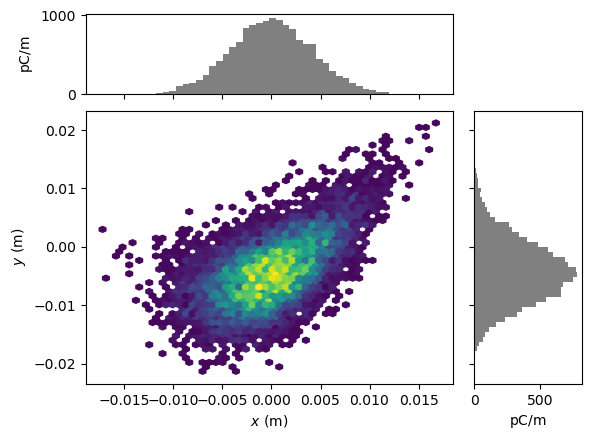

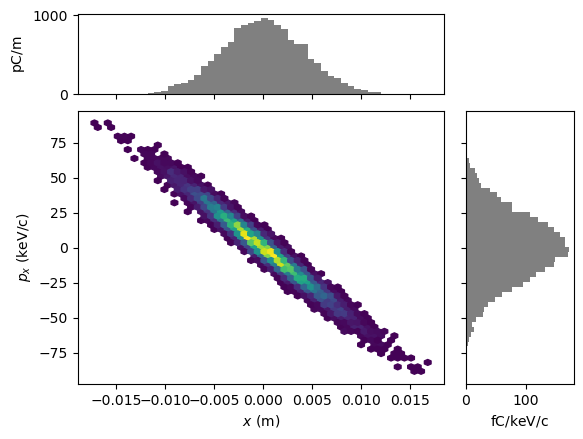

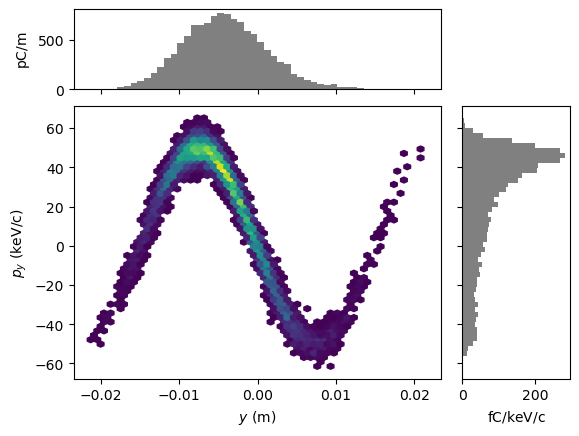

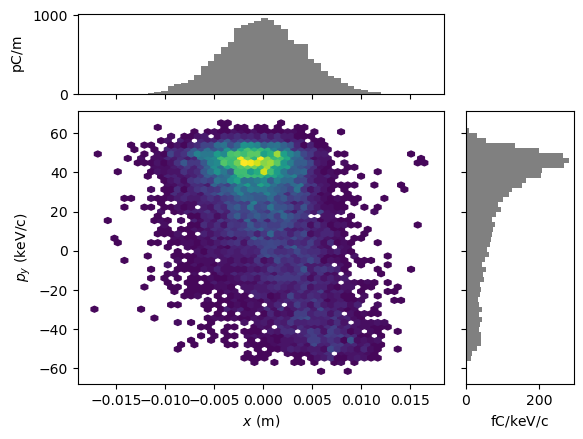

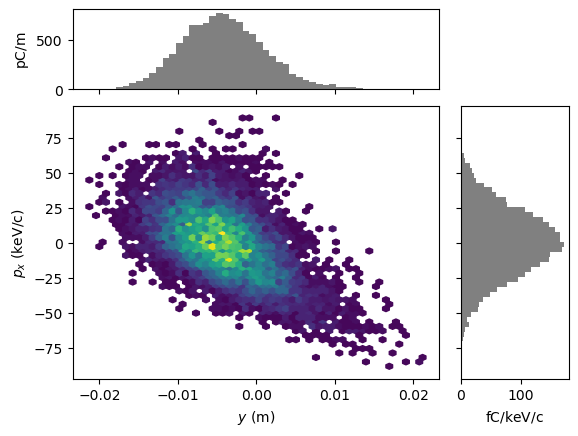

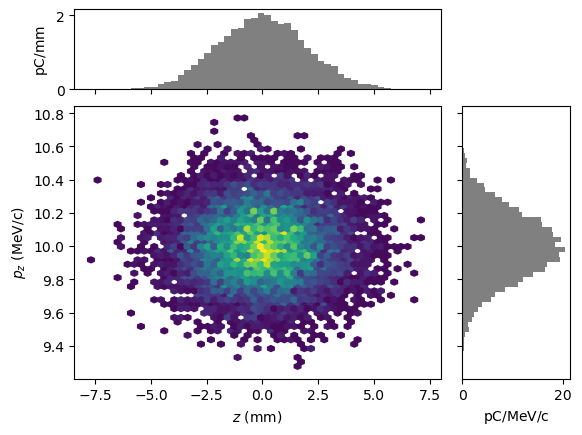

In [3]:
k = 2 * 3.14 / (30 * unit("mm"))

pycos = {
    "type": "cosine y:py",
    "amplitude": {"value": 0.05, "units": "MeV/c"},
    "omega": {"value": k.magnitude, "units": str(k.units)},
    "phase": {"value": 90, "units": "deg"},
}

linear_position = {
    "type": "polynomial x:y",
    "coefficients": [
        {"value": -0.005, "units": "m"},
        {"value": 0.75, "units": ""},
        {"value": 50.0, "units":"1/m"}
    ]
}

gen = Generator(yaml_str)

twiss_x = {
    "type": "set_twiss x",
    "beta": {
        "value": 9,
        "units": "m",
    },
    "alpha": {"value": 5, "units": ""},
    "emittance": {"value": 2.0, "units": "um"},
}

twiss_y = {
    "type": "set_twiss y",
    "beta": {
        "value": 9,
        "units": "m",
    },
    "alpha": {"value": 0, "units": ""},
    "emittance": {"value": 2.0, "units": "um"},
}

gen.input["transforms"] = {
    "twissx": twiss_x,
    "twissy": twiss_y,
    "pycos": pycos,
    #"linear_energy": linear_energy,
    "linear_position": linear_position,
    "order": ["twissx","twissy", "linear_position", "pycos"],#, "linear_energy"],
}
gen.run()
particles_3 = gen.particles

particles = particles_3

particles.plot("x", "y")
particles.plot("x", "px")
particles.plot("y", "py")
particles.plot("x", "py")
particles.plot("y", "px")
particles.plot("z", "pz")